In [62]:
import librosa
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
import numpy as np
import glob
from IPython.display import Audio

def normalise(array):
    array_min = -75
    array_max = 65
    norm_array = (array - array_min) / (array_max - array_min)
    return norm_array

In [70]:
rir_list = glob.glob('/mnt/Tesis/train/rir_reales/**/*.wav', recursive=True)
speech_list = glob.glob('/mnt/Tesis/train/speech/**/*.flac', recursive=True)

Normalizo el speech y la rir para ver que pasa.

In [78]:
rir, fs = librosa.load(rir_list[100], sr=16000)
rir = rir[np.argmax(rir):]/np.max(abs(rir[np.argmax(rir):]))

speech, fs = librosa.load(speech_list[100], sr=16000)
speech = speech[:32000]/np.max(np.abs(speech[:32000]))

reverb = fftconvolve(speech, rir)[:len(speech)]
early_reverb = fftconvolve(speech, rir[:32])[:len(speech)]
clean = speech

(-2.5, 2.5)

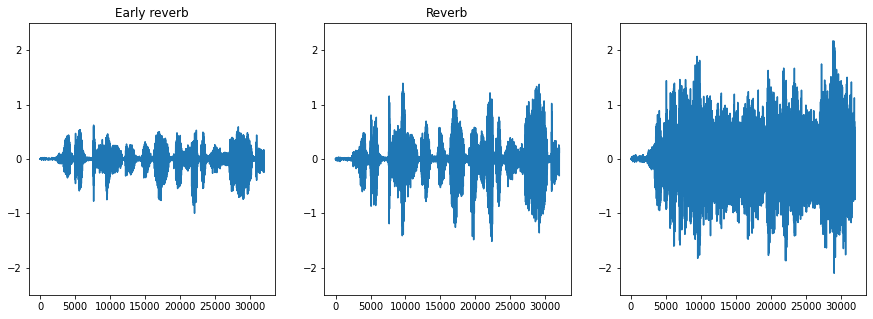

In [79]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].plot(speech);axs[0].set_title('Speech');axs[0].set_ylim(-2.5,2.5)
axs[1].plot(early_reverb);axs[0].set_title('Early reverb');axs[1].set_ylim(-2.5,2.5)
axs[2].plot(reverb);axs[1].set_title('Reverb');axs[2].set_ylim(-2.5,2.5)

In [80]:
EPS = np.finfo(float).eps

#Genero las STFT
stft_clean = librosa.stft(clean, n_fft=512, hop_length=128)[:-1,:]# Descarto altas frecuencias
stft_clean = np.abs(stft_clean)

stft_early = librosa.stft(early_reverb, n_fft=512, hop_length=128)[:-1,:]# Descarto altas frecuencias
stft_early = np.abs(stft_early)

stft_reverb = librosa.stft(reverb, n_fft=512, hop_length=128)[:-1,:]
stft_reverb = np.abs(stft_reverb)

#Escala logaritmica
log_stft_clean = librosa.amplitude_to_db(stft_clean)
log_stft_early = librosa.amplitude_to_db(stft_early)
log_stft_reverb = librosa.amplitude_to_db(stft_reverb)

#Normalizacion
norm_stft_reverb = normalise(log_stft_reverb)
norm_stft_early = normalise(log_stft_early)
norm_stft_clean = normalise(log_stft_clean)

Es MUY importante mantener los valores de vmin y vmax en ambos plots para que el colobar sea representativo de ambos espectros. De otra manera, no se podrian hacer deducciones a partir de comparar los colores de amplitud

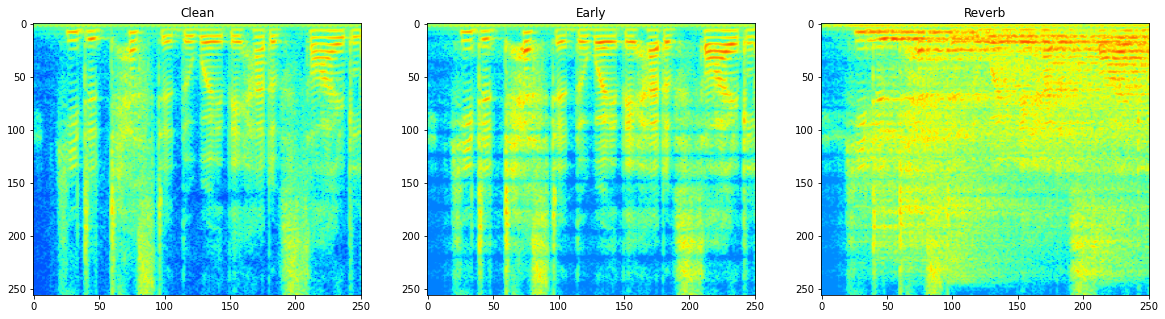

In [81]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.title('Clean')
plt.imshow(norm_stft_clean[:,:], vmin=0, vmax=1, cmap='jet', aspect='auto', label='clean')

plt.subplot(1, 3, 2)
plt.title('Early')
plt.imshow(norm_stft_early[:,:], vmin=0, vmax=1, cmap='jet', aspect='auto', label='clean')

plt.subplot(1, 3, 3)
plt.title('Reverb')
plt.imshow(norm_stft_reverb[:,:], vmin=0, vmax=1, cmap='jet', aspect='auto', label='reverb')

# Rangos de amplitud

In [13]:
from tqdm import tqdm
import glob
maxs, mins = [], []
reverb_list = glob.glob('/home/martin/deep-dereverb/data/train/real/*.npy', recursive=True)
clean_list = glob.glob('/home/martin/deep-dereverb/data/train/clean/*.npy', recursive=True)
for i in tqdm(range(2000)):
    clean = np.load(np.random.choice(clean_list))
    reverb = np.load(np.random.choice(reverb_list))

    #Genero las STFT
    stft_clean = librosa.stft(clean, n_fft=512, hop_length=128)[:-1,:]# Descarto altas frecuencias
    stft_clean = np.abs(stft_clean)
    stft_reverb = librosa.stft(reverb, n_fft=512, hop_length=128)[:-1,:]
    stft_reverb = np.abs(stft_reverb)

    #Escala logaritmica
    log_stft_clean = librosa.amplitude_to_db(stft_clean)
    log_stft_reverb = librosa.amplitude_to_db(stft_reverb)

    maxs.append(np.max((log_stft_clean,log_stft_reverb)))
    mins.append(np.min((log_stft_clean,log_stft_reverb)))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:42<00:00, 19.60it/s]


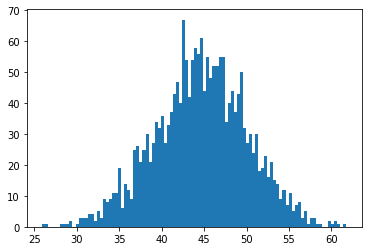

In [14]:
plt.hist(maxs, bins=100)
plt.show()

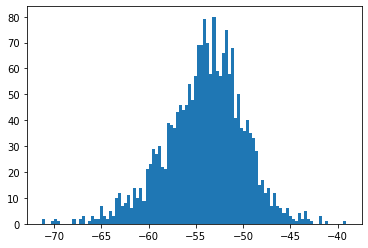

In [15]:
plt.hist(mins, bins=100)
plt.show()